In [1]:
!pip install -q wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
from nltk import word_tokenize
from nltk.corpus import stopwords

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#df=pd.read_csv('/content/drive/MyDrive/MARRI RAHUL 2/Corona_NLP (2).csv',encoding='ISO-8859-1')
df=pd.read_csv('/content/drive/MyDrive/MARRI RAHUL 2/Corona_NLP (2).csv',encoding='latin-1')
##pd.read_csv('File_name.csv',encoding='latin-1')


In [51]:
df.describe() 

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [5]:
df.shape

(41157, 6)

In [6]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [64]:
df['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

In [77]:
df['OriginalTweet'].sample(30000)

22908    Being helpful yet sensitive is one of the many...
18040    F.A.O any customer who dares to invade a super...
32966    People with vision impairments are struggling ...
1903     So hotels are suffering in #COVID2019 crisis -...
36709    Concern Grows Over Safety of Grocery Store Wor...
                               ...                        
4593     @suzydymna @RealJamesWoods Chinese Virus ... l...
35691    This storefront operator sold a two pack of ha...
8115     #Gold Prices Down Despite Forceful #Coronaviru...
12992    Worth more than gold...? Just got my loo roll ...
32325    I REALLY want a streaming video (or music) pro...
Name: OriginalTweet, Length: 30000, dtype: object

In [66]:
df['OriginalTweet'][1900]

'The retail store I work for has submitted a request to remain open with no restrictions. It must be great to be a CEO who can coddle at home and not be face to face with the general public and possibly catch COVID-19 and infect your father who would be killed by it.'

In [67]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import re

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [69]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
lb=WordNetLemmatizer()
stop=stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [71]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [72]:
token=nltk.word_tokenize('df')
print(df)

       UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet Sentiment  
0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i.

In [73]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [123]:
c=[]
for i in df['OriginalTweet']:
  txt=re.sub('[^A-Za-z0-9]',' ',i)
  txt=txt.lower()
  txt=word_tokenize(txt)
  txt=[i for i in txt if i not in stop]
  txt=[lb.lemmatize(i) for i in txt]
  txt=" ".join(txt)
  c.append(txt)

In [124]:
print(c[:100])

['menyrbie phil gahan chrisitv http co ifz9fan2pa http co xx6ghgfzcc http co i2nlzdxno8', 'advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order', 'coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid 19 outbreak http co binca9vp8p', 'food stock one empty please panic enough food everyone take need stay calm stay safe covid19france covid 19 covid19 coronavirus confinement confinementotal confinementgeneral http co zrlg0z520j', 'ready go supermarket covid19 outbreak paranoid food stock litteraly empty coronavirus serious thing please panic cause shortage coronavirusfrance restezchezvous stayathome confinement http co usmualq72n', 'news region first confirmed covid 19 case came sullivan county last week people flocked area store purchase cleaning supply hand sanitizer food toilet paper good tim dodson report http co cfxch7

In [28]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [29]:
df['Sentiment']=df['Sentiment'].replace({'Extremely Positive':'Positive','Extremely Negative':'Negative'})
df['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

***TF VECTORIZER***

In [141]:
t=TfidfVectorizer(max_features=20)
t_r=t.fit_transform(c).toarray()

In [142]:
print(t_r[:5])

[[0.         0.         0.70620051 0.         0.         0.
  0.         0.         0.         0.         0.70801189 0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.71506299 0.         0.         0.         0.69906003 0.
  0.         0.        ]
 [0.36473295 0.         0.31667483 0.         0.34333105 0.37086509
  0.         0.         0.         0.         0.31748708 0.
  0.         0.         0.         0.         0.6406807  0.
  0.         0.        ]
 [0.23143943 0.         0.20094439 0.         0.21785896 0.23533055
  0.36423855 0.67207064 0.         0.         0.20145981 0.42223148
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.29192264 0.         0.31649533 0.
  0.52914877 0.48817643 0.         0.         0.2926714  0.
  0.         0.         0.         0

***COUNT VECTORIZER***

In [143]:
v= CountVectorizer()
X = v.fit_transform(c)
v.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzxwzxhc2v', 'zzz', 'zzzz'],
      dtype=object)

In [144]:
print(X)

  (0, 42533)	1
  (0, 50355)	1
  (0, 27586)	1
  (0, 14979)	1
  (0, 32047)	3
  (0, 15678)	3
  (0, 32923)	1
  (0, 72604)	1
  (0, 32477)	1
  (1, 6594)	1
  (1, 63163)	1
  (1, 45432)	2
  (1, 24903)	1
  (1, 24273)	1
  (1, 50401)	2
  (1, 46832)	2
  (1, 17868)	1
  (1, 16497)	1
  (1, 39761)	1
  (1, 57918)	1
  (1, 23264)	1
  (1, 14716)	1
  (1, 29043)	1
  (1, 58608)	1
  (1, 48048)	1
  :	:
  (41156, 55801)	1
  (41156, 45543)	1
  (41156, 28759)	1
  (41156, 51728)	2
  (41156, 59519)	1
  (41156, 41669)	1
  (41156, 70309)	1
  (41156, 17847)	1
  (41156, 54441)	1
  (41156, 56064)	1
  (41156, 7541)	1
  (41156, 71360)	1
  (41156, 8066)	1
  (41156, 2675)	1
  (41156, 0)	2
  (41156, 67799)	1
  (41156, 67719)	1
  (41156, 4314)	1
  (41156, 69275)	1
  (41156, 7293)	1
  (41156, 30667)	1
  (41156, 31328)	1
  (41156, 63271)	1
  (41156, 55795)	1
  (41156, 70631)	1


In [145]:
x=t_r
y=df['Sentiment']
print(len(x)) 
print(y.shape)

41157
(41157,)


In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [147]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[0.41689488 0.         0.         ... 0.56803106 0.56907362 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.5191248  ... 0.         0.         0.        ]
 ...
 [0.         0.         0.39258848 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 1.         0.         0.        ]]
[[0.         0.58740859 0.         ... 0.         0.         0.        ]
 [0.         0.         0.31736309 ... 0.         0.         0.66470789]
 [0.235485   0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.597101   0.        ]
 [0.         0.         0.46869902 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.62339801 0.         0.        ]]
13758    Negative
5954      Neutral
23900     Neutral
6452     Negative
14127    Negative
           ...   
3457

In [148]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30867, 20)
(10290, 20)
(30867,)
(10290,)


***APPLYING MODELS***

In [149]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

***1.MULTINOMIAL NAIVE BAYES CLASSIFICATION***

In [150]:
m=MultinomialNB()
m.fit(x_train,y_train)

MultinomialNB()

In [151]:
print('Training Score',m.score(x_train,y_train))
print('Training Score',m.score(x_test,y_test))


Training Score 0.4732238312761201
Training Score 0.4558794946550049


In [154]:
ypredict=m.predict(x_test)
print(ypredict)

['Negative' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']


In [155]:
con_mat=confusion_matrix(y_test,ypredict)
print(con_mat)

[[1247    0 2687]
 [ 346    0 1598]
 [ 968    0 3444]]


In [156]:
print(classification_report(y_test,ypredict))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Negative       0.49      0.32      0.38      3934
     Neutral       0.00      0.00      0.00      1944
    Positive       0.45      0.78      0.57      4412

    accuracy                           0.46     10290
   macro avg       0.31      0.37      0.32     10290
weighted avg       0.38      0.46      0.39     10290



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [158]:
from sklearn.metrics import accuracy_score
mul_accuracy = accuracy_score(y_test,ypredict)
mul_accuracy

0.4558794946550049

***RANDOMFORESTCLASSIFIER ***

In [152]:
ran=RandomForestClassifier()
ran.fit(x_train,y_train)

RandomForestClassifier()

In [153]:
print('Training Score',ran.score(x_train,y_train))
print('Training Score',ran.score(x_test,y_test))

Training Score 0.5994427705964298
Training Score 0.4478134110787172


In [169]:
ypredict2=ran.predict(x_test)
print(ypredict2)

['Negative' 'Negative' 'Positive' ... 'Positive' 'Neutral' 'Negative']


In [171]:
con_mat2=confusion_matrix(y_test,ypredict2)
print(con_mat2)

[[1692  148 2094]
 [ 575  142 1227]
 [1444  194 2774]]


In [172]:
print(classification_report(y_test,ypredict2))

              precision    recall  f1-score   support

    Negative       0.46      0.43      0.44      3934
     Neutral       0.29      0.07      0.12      1944
    Positive       0.46      0.63      0.53      4412

    accuracy                           0.45     10290
   macro avg       0.40      0.38      0.36     10290
weighted avg       0.42      0.45      0.42     10290



In [179]:

ran_accuracy = accuracy_score(y_test,ypredict2)
ran_accuracy

0.4478134110787172

In [163]:
import matplotlib.pyplot as plt


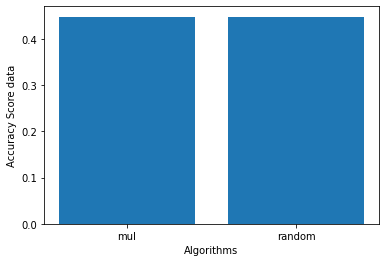

In [165]:
plt.bar(x=['mul','random'],height = [mul_accuracy,ran_accuracy])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score data")
plt.show()

***both multinomialNB and RandomForestClassifier has approx equal lets see knn classifier(multi-0.45 and random -0.44)***

In [166]:
k=KNeighborsClassifier()
k.fit(x_train,y_train)

KNeighborsClassifier()

In [175]:
print('Training Score',k.score(x_train,y_train))
print('Training Score',k.score(x_test,y_test))

Training Score 0.5044545955227265
Training Score 0.40602526724975707


In [176]:
ypredict3=k.predict(x_test)
print(ypredict3)

['Negative' 'Negative' 'Positive' ... 'Negative' 'Positive' 'Positive']


In [177]:
con_mat3=confusion_matrix(y_test,ypredict3)
print(con_mat3)

[[2171  390 1373]
 [ 950  254  740]
 [2196  463 1753]]


In [178]:
print(classification_report(y_test,ypredict3))

              precision    recall  f1-score   support

    Negative       0.41      0.55      0.47      3934
     Neutral       0.23      0.13      0.17      1944
    Positive       0.45      0.40      0.42      4412

    accuracy                           0.41     10290
   macro avg       0.36      0.36      0.35     10290
weighted avg       0.39      0.41      0.39     10290



In [181]:

k_accuracy = accuracy_score(y_test,ypredict3)
k_accuracy

0.40602526724975707

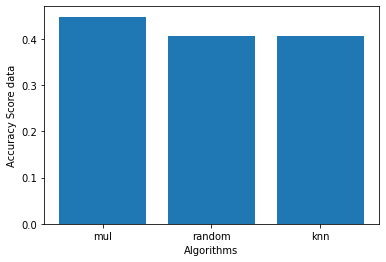

In [182]:
plt.bar(x=['mul','random','knn'],height = [mul_accuracy,ran_accuracy,k_accuracy ])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score data")
plt.show()

***THEEFORE THE MODEL WITH BEST ACCURACY IS KNN CLASSIFIER AS ITS ACCURACY IS  AND COMPARED TO RANDOMFORESTCLASSIFIER AND MULTINOMIAL CLASSIFIER  MUL:0.45,RANDOM :0.44,KNN:0.4044***